# Natural Language Processing

Author: Ricardo Castro Peraza and the members of Soy Henry (Programming Academy)

The actual project works with the dataset "news-hadlines-dataset-for-sarcams-detection" from Kaggle producing Naive Bayes, Random Forrest and SVM using Natural Language Processing (NLP) with the Bag of Words method evaluating all of them with the accuracy and a confussion matrix 

Dataset:
https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection/

In [53]:
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk

# Important for the configuration of nltk. 
nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\el chico de
[nltk_data]     rosas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\el chico de
[nltk_data]     rosas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
dataset = pd.read_json('M6\Clase 08\Sarcasm_Headlines_Dataset.json', lines= True) #Lines=True is important for the \n for the line break
dataset.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [56]:
dataset['is_sarcastic']=dataset['is_sarcastic'].astype('category')

In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   article_link  26709 non-null  object  
 1   headline      26709 non-null  object  
 2   is_sarcastic  26709 non-null  category
dtypes: category(1), object(2)
memory usage: 443.7+ KB


In [58]:
dataset['is_sarcastic'].value_counts() #There are some equilibrium in the objective variable

0    14985
1    11724
Name: is_sarcastic, dtype: int64

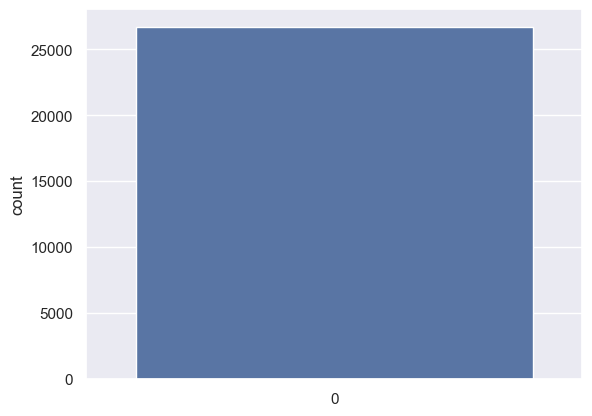

In [59]:
sns.countplot(data=dataset['is_sarcastic'])
plt.show()

# Normalization 
1.stopwords

In [60]:
stopwords = nltk.corpus.stopwords.words('english')
filter = []
if True:
    filter.append("u")
    filter.append("new")

In [61]:
dataset_no_sarcasm = dataset[dataset.is_sarcastic==0]
dataset_no_sarcasm.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0


In [62]:
#1. the list for the headlines with No Sarcams
headlines_no_sarcasm = [] 

#2 We gonna iterate in the dataset
for i in range(dataset_no_sarcasm.shape[0]):

    #Taking the headline of the dataset
    titular = dataset_no_sarcasm.iloc[i].headline 

    #Tokenization of the headline
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    
    #Checking every word for NOT being a Stop Word or part of the Filter
    titular = [word for word in titular if word not in stopwords]
    titular = [word for word in titular if word not in filter]

    headlines_no_sarcasm.append(titular)

In [63]:
headlines_no_sarcasm = list(itertools.chain(*headlines_no_sarcasm))


In [64]:
freq_no_sarcasm = nltk.FreqDist(headlines_no_sarcasm)
freq_no_sarcasm

FreqDist({'trump': 1446, 'donald': 458, 'says': 349, 'women': 317, 'one': 268, 'year': 244, 'first': 242, 'world': 241, 'man': 241, 'people': 241, ...})

In [65]:
df_no_sarcasm = pd.DataFrame(list(freq_no_sarcasm.items()), columns = ["Word","Frequency"])
df_no_sarcasm.head()

,Word,Frequency
0,former,82
1,versace,1
2,store,14
3,clerk,5
4,sues,15


In [66]:
df_no_sarcasm.sort_values('Frequency',ascending=False, inplace = True)
df_no_sarcasm.head(30)

,Word,Frequency
46,trump,1446
229,donald,458
421,says,349
29,women,317
258,one,268
305,year,244
284,first,242
28,world,241
52,man,241
343,people,241


In [67]:
df_no_sarcasm.reset_index(drop = True, inplace=True)
df_no_sarcasm.head()

,Word,Frequency
0,trump,1446
1,donald,458
2,says,349
3,women,317
4,one,268


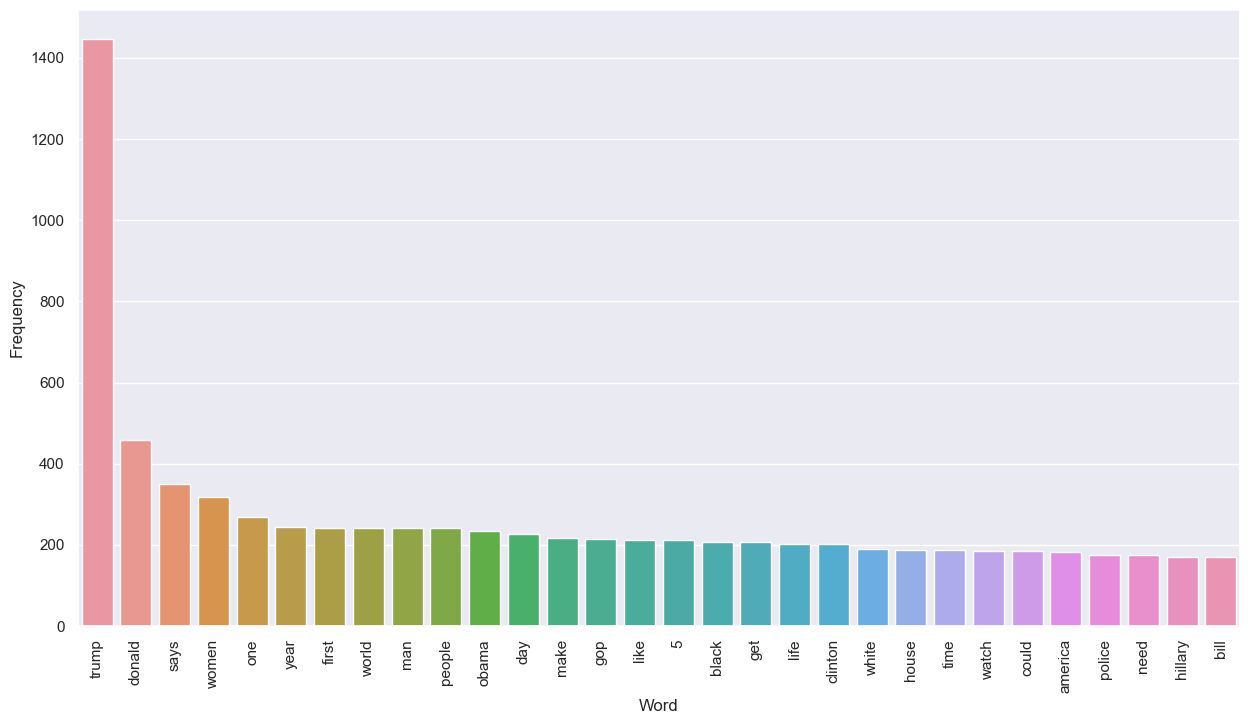

In [68]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_no_sarcasm.iloc[:30].Word, y = df_no_sarcasm.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [69]:
#Dataset with sarcasm headline

dataset_sarcasm = dataset[dataset.is_sarcastic==1]
dataset_sarcasm.head()

#Tokenization

headlines_sarcasm = []
for i in range(dataset_sarcasm.shape[0]):
    titular = dataset_sarcasm.iloc[i].headline
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stopwords]
    titular = [word for word in titular if word not in filter]
    headlines_sarcasm.append(titular)

headlines_sarcasm = list(itertools.chain(*headlines_sarcasm))

freq_sarcasm = nltk.FreqDist(headlines_sarcasm)
freq_sarcasm

FreqDist({'man': 1154, 'area': 480, 'report': 426, 'nation': 339, 'woman': 319, 'year': 308, 'one': 273, 'old': 267, 'time': 252, 'day': 245, ...})

In [70]:
df_sarcasm = pd.DataFrame(list(freq_sarcasm.items()), columns = ["Word","Frequency"])

df_sarcasm.sort_values('Frequency',ascending=False, inplace = True)

df_sarcasm.reset_index(drop = True, inplace=True)

df_sarcasm.head()

,Word,Frequency
0,man,1154
1,area,480
2,report,426
3,nation,339
4,woman,319


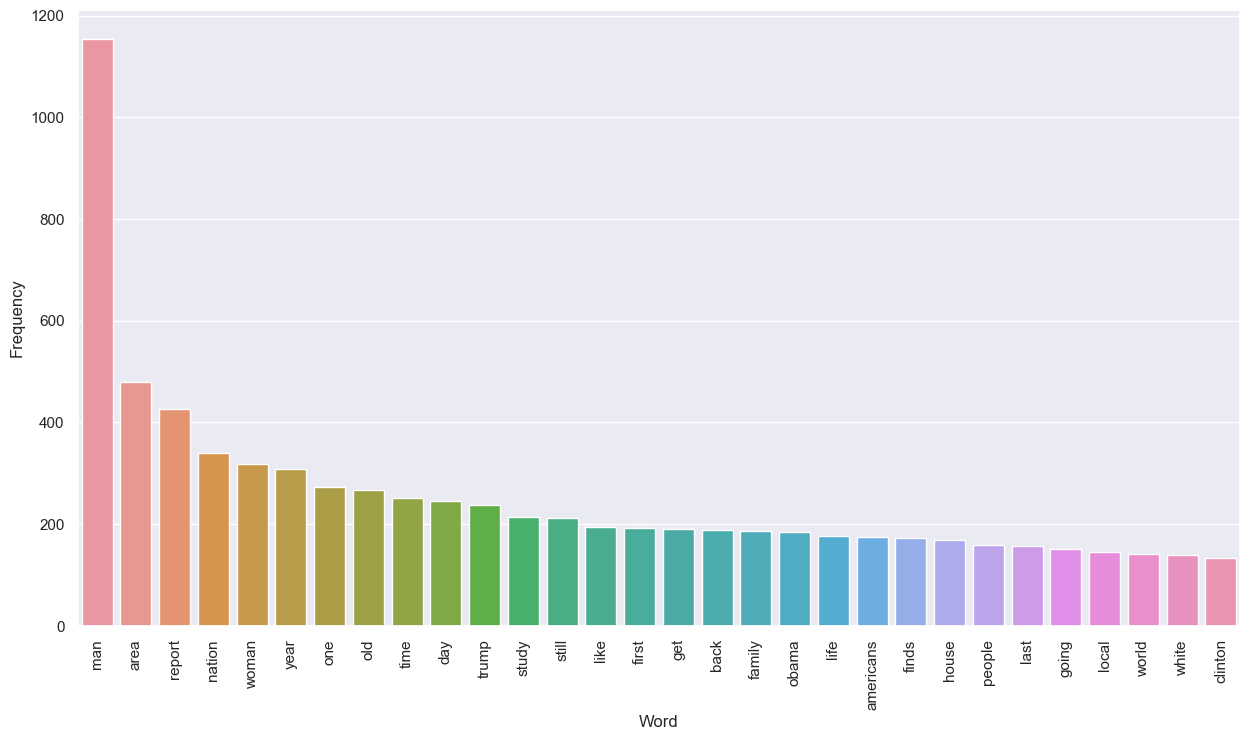

In [71]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_sarcasm.iloc[:30].Word, y = df_sarcasm.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

# Stemming

In [72]:
dataset=pd.concat([dataset.headline,dataset.is_sarcastic],axis=1)
dataset.dropna(axis=0,inplace=True)  # Drop any NaN in the dataset
dataset.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [73]:
# Library for removing special characters
import re

# Import Stemmizing from nltk and definying the stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# Stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [76]:
#Iterate every headlines, aplying normalization and stemming it
#hl=headline
#wrd=Word
headline_list=[]
for hl in dataset.headline:
    #1.Normalization
    # Replace 1st letter with space
    hl=re.sub("[^a-zA-Z]"," ",str(hl))
    # Convert everything to lower case
    hl=hl.lower()
    # Tokenization of the headline
    hl=nltk.word_tokenize(hl)
    # Drop word with lenght lower than 3 characters
    hl = [wrd for wrd in hl if len(wrd)>3]
    # Filter of the Stopwords
    hl = [wrd for wrd in hl if not wrd in stopwords]
    
    #2.Stemming
    # Aplying the function
    hle=[stemmer.stem(wrd) for wrd in hl]
    # Join the headline
    hl=" ".join(hl)

    # list with the headlines
    headline_list.append(hl)

In [77]:
headline_list


['former versace store clerk sues secret black code minority shoppers',
 'roseanne revival catches thorny political mood better worse',
 'starting fear series closest thing grandchild',
 'boehner wants wife listen come alternative debt reduction ideas',
 'rowling wishes snape happy birthday magical',
 'advancing world women',
 'fascinating case eating grown meat',
 'send kids school work company',
 'snake handler leaves sinking huckabee campaign',
 'friday morning email inside trump presser ages',
 'airline passengers tackle rushes cockpit bomb threat',
 'facebook reportedly working healthcare features apps',
 'north korea praises trump urges voters reject dull hillary',
 'actually jeffrey lord indefensible',
 'barcelona holds huge protest support refugees',
 'nuclear bomb detonates rehearsal spider musical',
 'cosby lawyer asks accusers come forward smeared legal team years',
 'stock analysts confused frightened boar market',
 'bloomberg program build better cities bigger',
 'craig hi

In [79]:
dataset["headline_stem"] = headline_list
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   headline       26709 non-null  object  
 1   is_sarcastic   26709 non-null  category
 2   headline_stem  26709 non-null  object  
dtypes: category(1), object(2)
memory usage: 443.7+ KB


In [81]:
dataset_stem=pd.concat([dataset.headline_stem,dataset.is_sarcastic],axis=1)
dataset_stem.head()

,headline_stem,is_sarcastic
0,former versace store clerk sues secret black c...,0
1,roseanne revival catches thorny political mood...,0
2,starting fear series closest thing grandchild,1
3,boehner wants wife listen come alternative deb...,1
4,rowling wishes snape happy birthday magical,0


# Lemmatization

In [83]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [86]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

dataset = pd.read_json('M6\Clase 08\Sarcasm_Headlines_Dataset.json', lines= True)
dataset = pd.concat([dataset.headline,dataset.is_sarcastic],axis=1)
dataset.dropna(axis=0,inplace=True)

In [88]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [89]:
headline_list=[]
for hl in dataset.headline:
    # Replace the non-letter characters for spaces
    hl=re.sub("[^a-zA-Z]"," ",str(hl))
    # Turn in everything to lowercase letter
    hl=hl.lower()
    # Tokenization
    hl=nltk.word_tokenize(hl)
    
    # Lemmatizer
    lemma_frase = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in hl]
    
    
    # droping the word with a lenght minor to 3
    hl = [wrd for wrd in hl if len(wrd)>3]
    # get off stopwords
    hl = [wrd for wrd in hl if not wrd in stopwords]
    
    # Joint the headlines
    hl=" ".join(hl)
    
    headline_list.append(hl)

In [93]:
dataset["headline_lemm"] = headline_list
dataset_lemm = pd.concat([dataset.headline_lemm,dataset.is_sarcastic],axis=1)
dataset_lemm.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
dataset_lemm.head()

,headline_lemm,is_sarcastic
0,former versace store clerk sues secret black c...,0
1,roseanne revival catches thorny political mood...,0
2,starting fear series closest thing grandchild,1
3,boehner wants wife listen come alternative deb...,1
4,rowling wishes snape happy birthday magical,0


# Vectorization

In [98]:
list_headlines_lemm = list(dataset_lemm['headline_lemm'].values)
is_sarc_lemm = dataset_lemm['is_sarcastic'].values


list_headlines_stem = list(dataset_stem['headline_stem'].values)
is_sarc_stem = dataset_stem['is_sarcastic'].values

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
# I will use only the first 1000 words more frecuent in the texts
max_features=1000
# Every vector will have 1000 elements: 0 in absence of the word and 1 in presence
cou_vec=CountVectorizer(max_features=max_features, stop_words="english" , ngram_range=(1,2))

In [105]:
matrix_headlines_lemm = cou_vec.fit_transform(list_headlines_lemm)
all_words_lemm = cou_vec.get_feature_names_out()

In [109]:
# Visualize the first 50 words
print("50 most used words [lemmanization]: ",all_words_lemm[0:200])

50 most used words [lemmanization] ['abortion' 'abuse' 'accidentally' 'according' 'accused' 'action'
 'activists' 'actor' 'actually' 'address' 'adds' 'administration' 'admits'
 'adorable' 'advice' 'afghanistan' 'ahead' 'airlines' 'airport' 'album'
 'allegations' 'amazing' 'amazon' 'america' 'american' 'americans' 'amid'
 'anniversary' 'announce' 'announces' 'anti' 'apartment' 'apologizes'
 'apparently' 'apple' 'archives' 'area' 'area woman' 'arrested' 'artist'
 'asked' 'asking' 'asks' 'assault' 'attack' 'attacks' 'attempt' 'audience'
 'average' 'avoid' 'award' 'awards' 'away' 'baby' 'band' 'bank' 'bathroom'
 'battle' 'bear' 'beautiful' 'beauty' 'beer' 'begins' 'believe' 'bernie'
 'bernie sanders' 'best' 'better' 'biden' 'biggest' 'billion' 'bird'
 'birth' 'birthday' 'black' 'blood' 'blue' 'board' 'body' 'book' 'books'
 'border' 'boss' 'bowl' 'boyfriend' 'boys' 'break' 'breaking' 'breaks'
 'bring' 'brings' 'brother' 'brown' 'budget' 'building' 'bush' 'business'
 'california' 'called' 'c

### Bag of words

In [152]:
#Lemmanization
feature_names = cou_vec.get_feature_names_out()
pd.DataFrame(matrix_headlines_lemm.toarray(), columns = feature_names)

,abortion,abuse,accidentally,according,accused,action,activists,actor,actually,address,...,worried,worse,worst,worth,wrong,year,years,york,young,youth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26707,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
matrix_headlines_stem= cou_vec.fit_transform(list_headlines_stem)
all_words_stem = cou_vec.get_feature_names_out()

In [153]:
#Stemnization
feature_names = cou_vec.get_feature_names_out()
pd.DataFrame(matrix_headlines_stem.toarray(), columns = feature_names)

,abortion,abuse,accidentally,according,accused,action,activists,actor,actually,address,...,worried,worse,worst,worth,wrong,year,years,york,young,youth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26707,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
# Visualize the first 50 words
print("50 most used words [stemanization]: ",all_words_stem[0:200])

50 most used words [stemanization]:  ['abortion' 'abuse' 'accidentally' 'according' 'accused' 'action'
 'activists' 'actor' 'actually' 'address' 'adds' 'administration' 'admits'
 'adorable' 'advice' 'afghanistan' 'ahead' 'airlines' 'airport' 'album'
 'allegations' 'amazing' 'amazon' 'america' 'american' 'americans' 'amid'
 'anniversary' 'announce' 'announces' 'anti' 'apartment' 'apologizes'
 'apparently' 'apple' 'archives' 'area' 'area woman' 'arrested' 'artist'
 'asked' 'asking' 'asks' 'assault' 'attack' 'attacks' 'attempt' 'audience'
 'average' 'avoid' 'award' 'awards' 'away' 'baby' 'band' 'bank' 'bathroom'
 'battle' 'bear' 'beautiful' 'beauty' 'beer' 'begins' 'believe' 'bernie'
 'bernie sanders' 'best' 'better' 'biden' 'biggest' 'billion' 'bird'
 'birth' 'birthday' 'black' 'blood' 'blue' 'board' 'body' 'book' 'books'
 'border' 'boss' 'bowl' 'boyfriend' 'boys' 'break' 'breaking' 'breaks'
 'bring' 'brings' 'brother' 'brown' 'budget' 'building' 'bush' 'business'
 'california' 'called' 

# Modeling

### I'm gonna train this with the Lemmatization dataset first

In [113]:
x_lemm = matrix_headlines_lemm.toarray()
x_lemm.shape
y_lemm = is_sarc_lemm

In [114]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_lemm,y_lemm,test_size=0.2,random_state=42,stratify=y_lemm) 
#Stratify takes a balanced number of 0 and 1 features in y_lemm

In [115]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    names=["Not Sarcastic","Sarcastic"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

### Naive Bayes <br>
beanchmark for the accuracy

In [116]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.6722201422688132


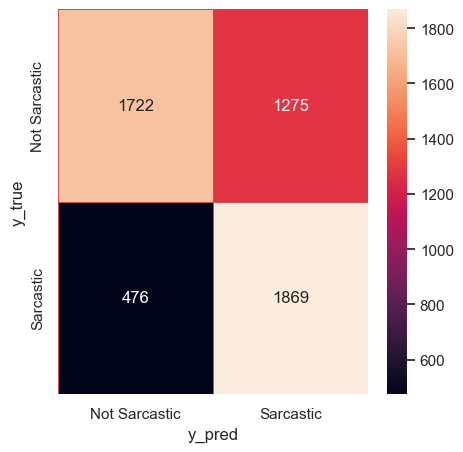

In [117]:
y_pred=nb.predict(xtest)
confusion(ytest,y_pred)

### Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators = 50, random_state=42)
rf.fit(xtrain,ytrain)
print("acc: ",rf.score(xtest,ytest))

acc:  0.7109696742792961


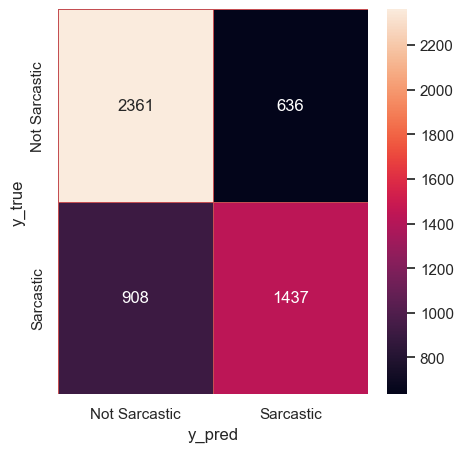

In [119]:
y_pred=rf.predict(xtest)
confusion(ytest,y_pred)

Something very useful about Random Forest is to ask about the importance of the features used for the classification

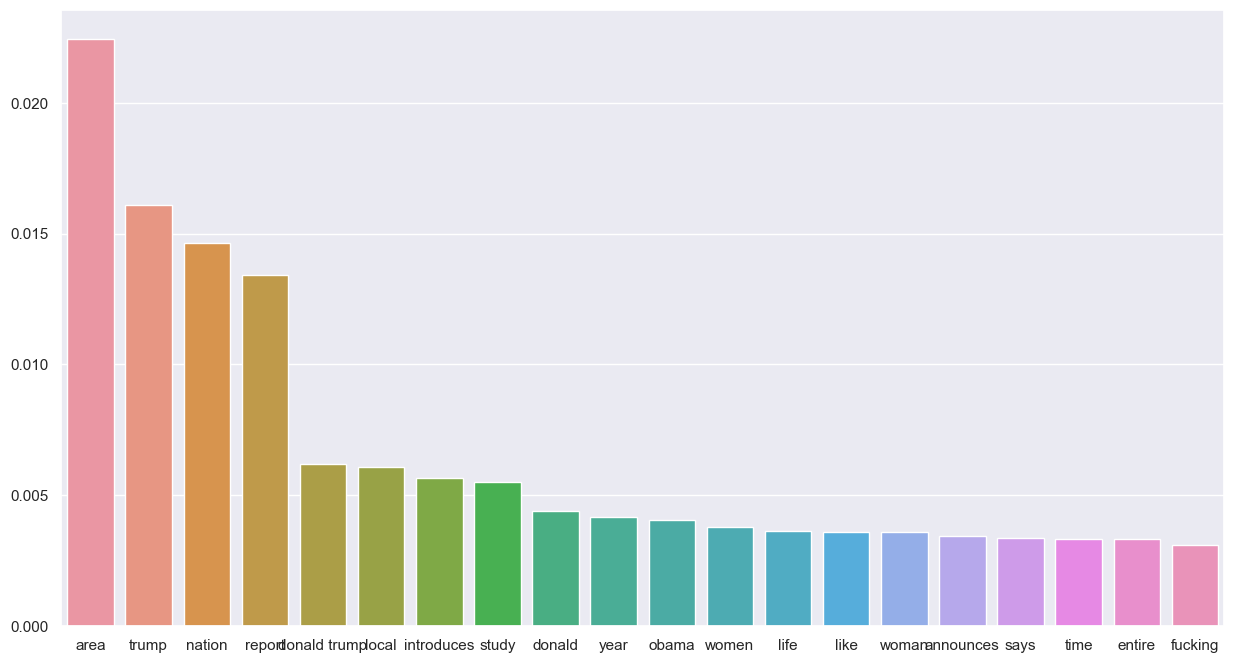

In [121]:
# Importance for each feature (or word)
importances = rf.feature_importances_

all_words_lemm=cou_vec.get_feature_names_out()
columns_lemm = all_words_lemm

# Sort by importance and take the first 20
index = np.argsort(importances)[::-1]
index = index[:20]
selected_columns = [columns_lemm[i] for i in index]
selected_importances = importances[index]

# Let's graph
plt.figure(figsize = (15,8))
sns.barplot(x=selected_columns, y=selected_importances)
plt.show()

### SVM 
the number of features is comparable to the number of instances

In [122]:
# For the linear Kernel (LinearSVC) is faster than the traditional SVC
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(xtrain,ytrain)
svc.score(xtest,ytest)

0.7281916885061774

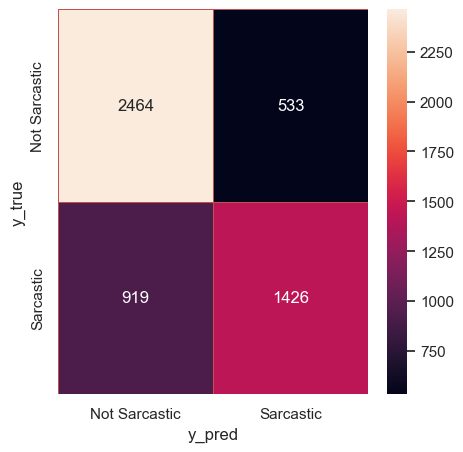

In [123]:
y_pred=svc.predict(xtest)
confusion(ytest,y_pred)

### Time to Stemmanization

In [142]:
x_stem = matrix_headlines_stem.toarray()
x_stem.shape
y_stem= is_sarc_stem

In [143]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_stem,y_stem,test_size=0.2,random_state=42,stratify=y_stem) 

 ### Naive Bayes

In [144]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.6722201422688132


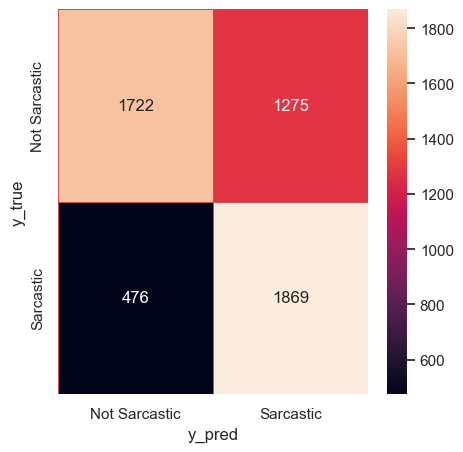

In [147]:
y_pred=nb.predict(xtest)
confusion(ytest,y_pred)

### Random Forrest

In [146]:
rf = RandomForestClassifier(n_estimators = 50, random_state=42)
rf.fit(xtrain,ytrain)
print("acc: ",rf.score(xtest,ytest))

acc:  0.7109696742792961


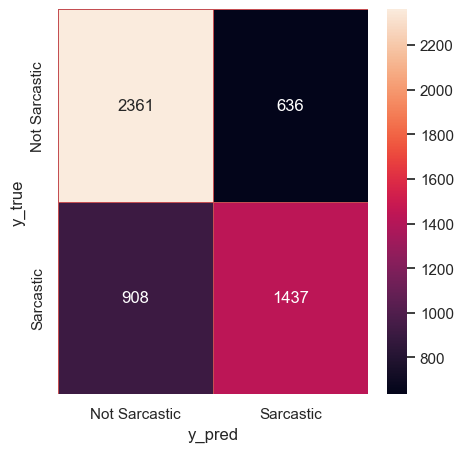

In [148]:
y_pred=rf.predict(xtest)
confusion(ytest,y_pred)

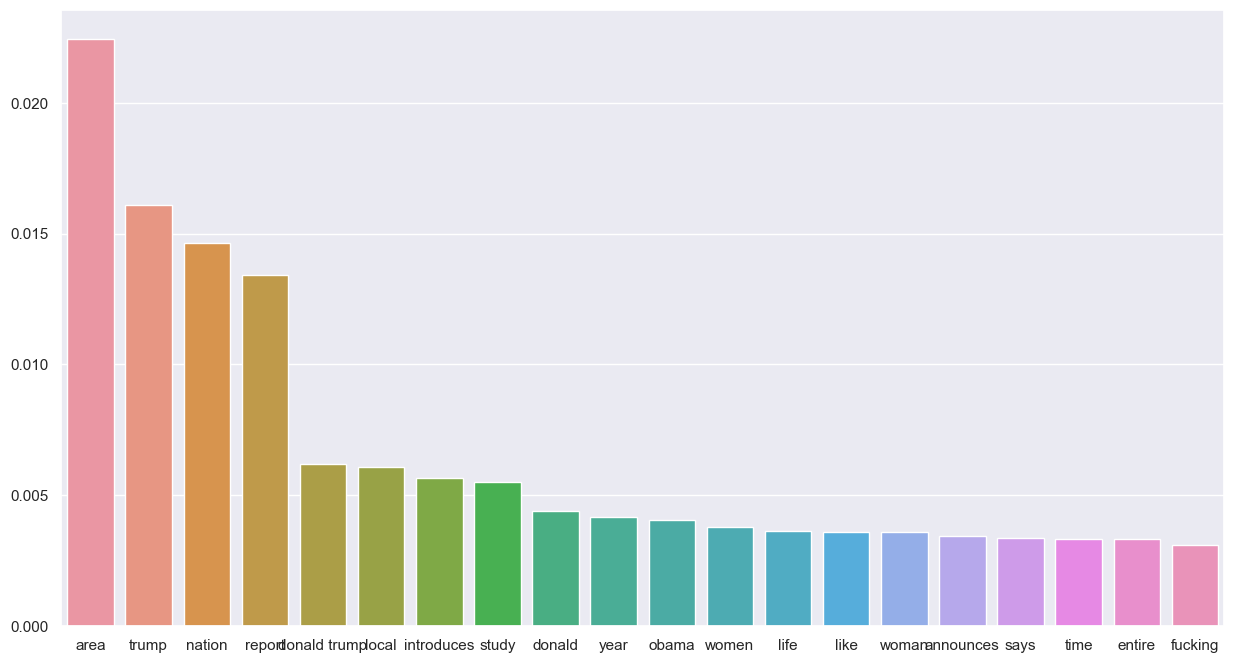

In [149]:
# Importance for each feature (or word)
importances = rf.feature_importances_

all_words_stem=cou_vec.get_feature_names_out()
columns_stem = all_words_stem

# Sort by importance and take the first 20
index = np.argsort(importances)[::-1]
index = index[:20]
selected_columns = [columns_stem[i] for i in index]
selected_importances = importances[index]

# Let's graph
plt.figure(figsize = (15,8))
sns.barplot(x=selected_columns, y=selected_importances)
plt.show()

### SVM

In [150]:
svc = LinearSVC(C = 1)
svc.fit(xtrain,ytrain)
svc.score(xtest,ytest)

0.7281916885061774

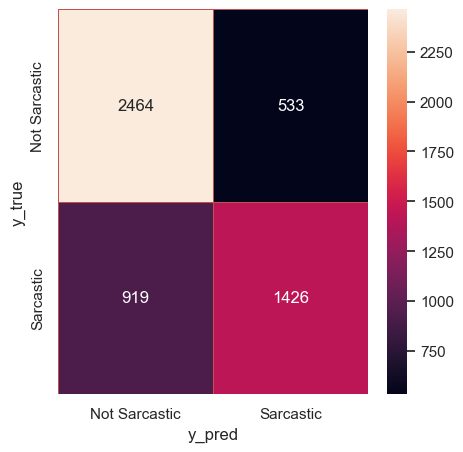

In [151]:
y_pred=svc.predict(xtest)
confusion(ytest,y_pred)